# Test kem1pert2r4ct output SIC and SICN

In [1]:
import numpy as np
import platform as platform
import cccmaplots as cplt
import cccmautils as cutl
import cccmaNC as cnc
import constants as con
%matplotlib inline

con = reload(con)

deni = 913 # kg/m3 density of ice
model = 'CanAM4'
bp=con.get_basepath()
basepath=bp['basepath'] + model + '/'; subdir=bp['subdir']

field='sic'
casename='kem1pert2r4ct'

fname = basepath + casename + subdir + casename + '_' + field + '_001-041_ts.nc'

fld = cnc.getNCvar(fname,field.upper())
lat = cnc.getNCvar(fname,'lat')
lon = cnc.getNCvar(fname,'lon')

fieldsicn = 'sicn'
fname = basepath + casename + subdir + casename + '_' + fieldsicn + '_001-041_ts.nc'
fldsicn = cnc.getNCvar(fname,fieldsicn.upper())

fld=fld[12:24,...]
fldsicn=fldsicn[12:24,...]

print fld.shape
print fldsicn.shape

(12, 64, 129)
(12, 64, 129)


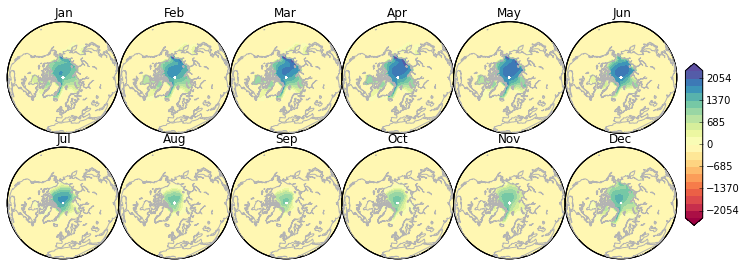

In [2]:
pparams = dict(type='nh',cmin=-2.5*deni,cmax=2.5*deni,cmap='Spectral')

fig = cplt.map_allmonths(fld,lat,lon,**pparams)

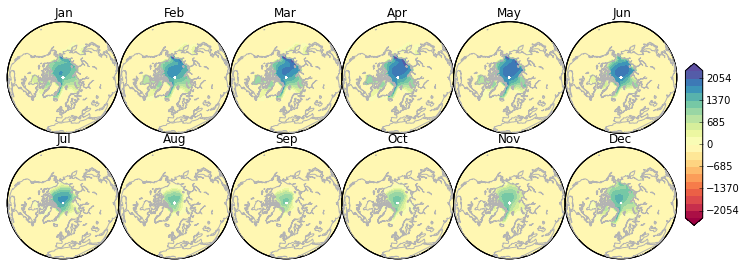

In [3]:
import numpy.ma as ma
import copy

pparams = dict(type='nh',cmin=-2.5*deni,cmax=2.5*deni,cmap='Spectral')
fldm=copy.copy(fld)
fldm[np.logical_and(fldsicn<=0.01,fld>0)] = -5000 # where is there SIT and not SIC?
#fldm=ma.masked_where(fldsicn<=.01,fldm)
fig = cplt.map_allmonths(fldm,lat,lon,**pparams)

In [4]:
# are there any cells where there is a sea ice thickness but 0 concentration?
icemask = np.logical_and(fldsicn<=0.01,fld>0) 
print icemask.shape
print icemask[icemask==True] # this gives an empty array
# answer, no.

(12, 64, 129)
[]


In [20]:
greater0 = fld>0
print greater0.shape
print greater0[greater0==True].shape
# testing that this test actually does something
# and it does, and it doesn't just return all elements (12*64*129)

(12, 64, 129)
(13636,)
